In [173]:
!wget https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_gray.bmp

--2021-09-25 17:43:28--  https://eeweb.engineering.nyu.edu/~yao/EL5123/image/lena_gray.bmp
Resolving eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)... 128.238.64.104
Connecting to eeweb.engineering.nyu.edu (eeweb.engineering.nyu.edu)|128.238.64.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263224 (257K) [image/bmp]
Saving to: ‘lena_gray.bmp’

lena_gray.bmp       100%[===================>] 257.05K  --.-KB/s    in 0.08s   

2021-09-25 17:43:30 (3.33 MB/s) - ‘lena_gray.bmp’ saved [263224/263224]



In [174]:
import numpy as np
import imageio 
import matplotlib.pyplot as plt
from scipy.fftpack import fftn,ifftn,fftshift,fft2,ifft2,ifftshift

# 1. List applications of frequency filters, explain their uses in terms of noise filtering, detecting features in image.

1. to reduce noise in image a low pass filter can be used.
2. for edge detection in an image an high pass filter can be used.



# 2. Generate an image of size 256X256 with a 2D Gaussian function at the centre of the image. (hint: use the image centre, sigma =2.5). Let the spatial spacing be Δx = Δy=0.1. Compute the FT of and plot the result image in the K-space. Use Kx=π/Δx and similarly for Ky. Remember to generate K-space from -k:k.

In [175]:
def gaussian_image(size,sigma):
  cen_x=size[0]//2
  cen_y=size[1]//2
  img=np.zeros(size)
  for i in range(size[0]):
    for j in range(size[1]):
      img[i][j]=1/(sigma*sigma*((2*np.pi))) * np.exp(-(0.1*(i-cen_x)/sigma)**2) * np.exp(-(0.1*(j-cen_y)/sigma)**2)
  return img

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


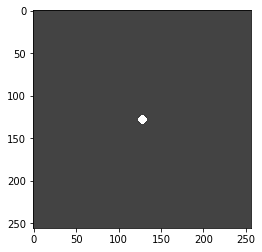

In [176]:
plt.imshow(np.log(10+np.real(fftshift(fft2(gaussian_image((256,256),2.5))))),cmap="gray")
plt.show()

# 3. Find a grayscale image of a scientist. Make sure that it is a grayscale 8-bit image,else please convert the image. This is your working image for the FT questions.

In [177]:
img=imageio.imread("lena_gray.bmp")

In [178]:
img=img.astype("uint8")

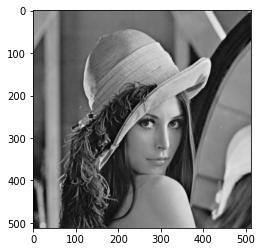

In [179]:
plt.imshow(img,cmap="gray") # Just used this image as this picture was often used in image processing papers and happens to be an 8 bit image.
plt.show()

## i. Compute the FT of the image, make sure to order the spectrum and plot thelog(FT) or (1+log(FT)) to be able to see the results clearly. Comment. (1)

In [180]:
img

Array([[160, 160, 160, ..., 169, 154, 129],
       [161, 160, 159, ..., 168, 154, 129],
       [160, 161, 160, ..., 168, 154, 129],
       ...,
       [ 50,  49,  55, ..., 106, 103, 104],
       [ 49,  50,  58, ..., 107, 109, 111],
       [ 50,  49,  59, ..., 107, 108, 112]], dtype=uint8)

In [181]:
ft=fftshift(fft2(img))

In [182]:
#ft=np.real(ft)

In [183]:
#ft=np.maximum(0,np.minimum(255,ft))

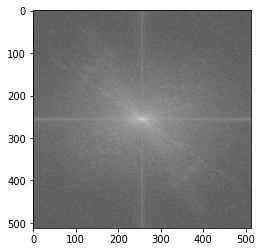

In [184]:
plt.imshow(np.log(1+np.abs(ft)),cmap="gray")

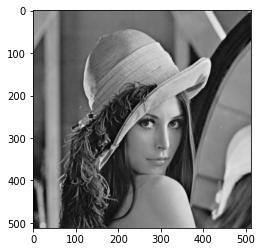

In [185]:
plt.imshow(np.real(ifft2(ifftshift(ft))),cmap="gray")

This image's spectrum is rich in low frequency sinosoides , leading to bright region in middle of the spectrum. The dark spot near the edges indicate small amplitudes for high frequency sinosoides. The dc component (bright point at center) contributes most to the images's spectrum.

## ii. Compute the amplitude and phase information of the image separately.

In [186]:
amp=np.abs(ft)
phase=np.angle(ft)

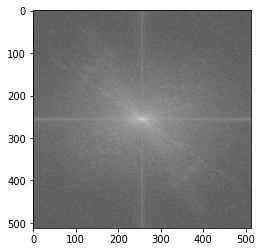

In [187]:
plt.imshow(np.log(1+amp),cmap="gray") # amplitude plot

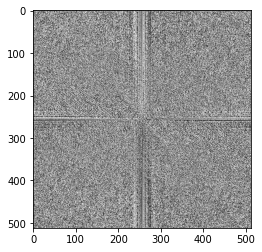

In [188]:
plt.imshow(np.log(10+phase),cmap="gray") # phase plot

## iii. Take the inverse FT of amplitude image. How similar is this to original image.? Explain your result.

In [189]:
new_img=np.real(ifft2(ifftshift(amp)))

In [190]:
new_img=np.maximum(0,np.minimum(255,new_img))

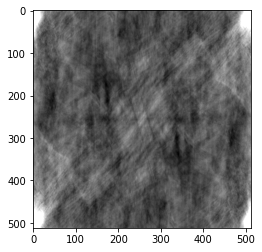

In [191]:
plt.imshow(new_img,cmap="gray")

With the phase information being lost the inverse fourier transform is unable to generate the actual image , the amplitude's fourier transform is very different from actual image

## iv. Take the inverse FT of the FT image. How similar is this image to the original image. Explain your result.

In [192]:
ft_of_ft=fft2(ifftshift(ft))

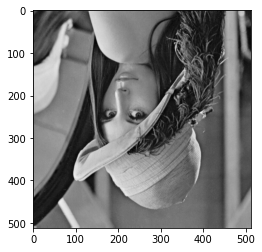

In [193]:
plt.imshow(np.real(ft_of_ft),cmap="gray")

We get an mirrored image , image data is a real valued data . when fourier transform of the fourier transform is taken instead of having -jsin(wt) (in fourier transform) we have +jcos(wt) (in inverse fourier transform) term leads to mirroring of values and this in turn leads to mirroring of original image.



# 4. Now start with the grayscale image of the scientist again.

## i. Pad the image on all four sides using zero-padding and then pad the image by appending zeros to the ends of rows and columns in the image. Make sure that the total number of zeros used in both cases is same. Do you think it would make a difference? Explain.

In [194]:
padded_image=np.pad(img,1)

In [195]:
padded_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 160, 160, ..., 154, 129,   0],
       [  0, 161, 160, ..., 154, 129,   0],
       ...,
       [  0,  49,  50, ..., 109, 111,   0],
       [  0,  50,  49, ..., 108, 112,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [196]:
import copy
adding_zeros=[]
for i in range(len(img)):
  adding_zeros.append(np.append(img[i],[0.0]))
adding_zeros.append(np.zeros(img.shape[1]))
adding_zeros=np.array(adding_zeros)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [197]:
adding_zeros[0],padded_image[0];

Yes it makes  a difference as padding and adding zeros at end of rows and columns isnt the same process as in padding zeros are added at start of rows and columns as well

## ii. Using the padded image, compute the ordered FT spectrum. How is this result different from 1i. Plot the log of both FT’s and comment.

In [198]:
padded_image_ft=fftshift(fftn(padded_image))

Text(0.5, 1.0, 'no padding image FT')

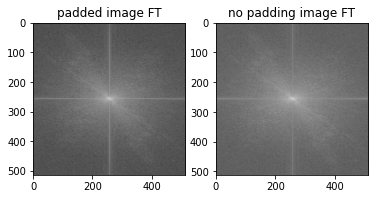

In [199]:
plt.subplot(1,2,1)
plt.imshow(np.log(1+np.abs(padded_image_ft)),cmap="gray")
plt.title("padded image FT")

plt.subplot(1,2,2)
plt.imshow(np.log(1+np.abs(ft)),cmap="gray")
plt.title("no padding image FT")

 The padded image's spectrum has smaller amplitudes in high frequency range

iii. To the padded image, apply a low pass filter to smoothen the image and highlight
features using high pass filter. Explain (4)

In [200]:
def low_pass_filter(image):
  filter=np.zeros(image.shape)
  cen_x=(filter.shape[0])//2
  cen_y=(filter.shape[1])//2
  width=35
  for i in range(filter.shape[0]):
    for j in range(filter.shape[1]):
      if (np.abs(i-cen_x)<width) and (np.abs(j-cen_y)<width):
        filter[i][j]=1.0
  
  ft=fftshift(fft2(image))
  new_image_fourier=np.multiply(ft,filter)
  #print(new_image_fourier)
  new_image=np.real(ifft2(fftshift(new_image_fourier)))

  return new_image

In [201]:
def high_pass_filter(image):
  filter=np.zeros(image.shape)
  cen_x=(filter.shape[0])//2
  cen_y=(filter.shape[1])//2
  width=5
  for i in range(filter.shape[0]):
    for j in range(filter.shape[1]):
      if (np.abs(i-cen_x)>width) and (np.abs(j-cen_y)>width):
        filter[i][j]=1.0
  
  ft=fftshift(fft2(image))
  new_image_fourier=np.multiply(ft,filter)
  #print(new_image_fourier)
  new_image=np.real(ifft2(fftshift(new_image_fourier)))

  return new_image

 High pass : The edges in the image are visible exactly what we expect from a high pass filter

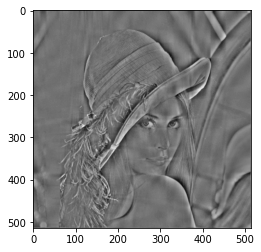

In [202]:
plt.imshow(high_pass_filter(padded_image),cmap="gray")

The low pass filter creates a blurring effect on the image

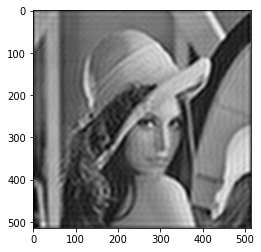

In [203]:
plt.imshow(low_pass_filter(padded_image),cmap="gray")

# 5. Compute the FT of the pattern and comment.

In [204]:
!wget https://i.stack.imgur.com/aHX6X.gif

--2021-09-25 17:43:34--  https://i.stack.imgur.com/aHX6X.gif
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.200.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.200.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15548 (15K) [image/gif]
Saving to: ‘aHX6X.gif.1’

aHX6X.gif.1         100%[===================>]  15.18K  --.-KB/s    in 0s      

2021-09-25 17:43:35 (35.1 MB/s) - ‘aHX6X.gif.1’ saved [15548/15548]



In [205]:
img2=imageio.imread("aHX6X.gif")

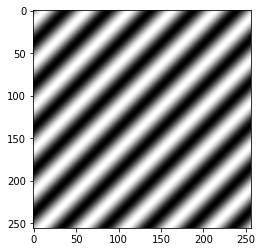

In [206]:
plt.imshow(img2,cmap="gray")

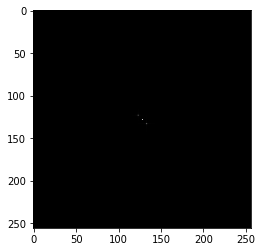

In [207]:
plt.imshow(np.abs(fftshift(fft2(img2))),cmap="gray") # 3 points close to origin along y=-x

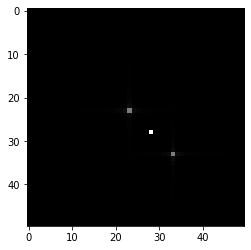

In [225]:
plt.imshow(np.abs(fftshift(fft2(img2)))[100:150,100:150],cmap="gray") # zoom in near center

We can see three points along y=-x line one point for dc component , another two indicating the sinosoidal wave along the y=-x direction .

# 6. What is wraparound error? How can it be prevented? (1)





The wraparound occurs when convolving signals of similar frequencies where they can interfere with each other and instaed of a large value being assigned to their convolution a small value is assigned.

To avoid such errors zero padding or mirror padding shall be applied to an image.

# 7. Explain separability property in 2D Fourier transform. (1)

For a 2 dimensional function the fourier transform computed along x and y direction can be computed independently also along x and y direction . The 2D fourier transform can be implemented as two 1 D fourier transform computed independently also x and then y direction.

# 8. The image on the left in the figure below consists of alternating stripes of black/white, each stripe being two pixels wide. The image on the right is the Fourier spectrum of the image on the left, showing the dc term and the frequency terms corresponding to the stripes. (Remember, the spectrum is symmetric so all components, other than the dc term, appear in two symmetric locations)

## i. Why are the components of the spectrum limited to the horizontal axis?



Answer: The image can be constructed from just sin and cos curves along the y-axis ,the image being periodic hence the spectrum should have a discrete set of points along the x-axis as the image needs only a set of frequencies to construct the image.

## ii. What would the spectrum look like for an image of the same size but havingstripes that are one pixel wide? Explain the reason for your answer.

Answer: The spectrum would have a point at origin(frequency 0) and two points along x-axis at different points symmetric about the origin. These points will be (0,pi) and (0,-pi).These 2 points on spectrum shall changed based on images's strip width.

## iii.If you rotate the image by 30degree, explain if that will affect the spectrum image and why?

Answer: The spectrum also rotates by 30 degrees as the image rotates by 30 degrees.

# 9. Compute the FT of the zonal plate image from the previous assignment. Explain its FT. Perform a 2D Butterworth filtering (both LPF & HPF) and frequency domain Gaussian filtering operation (both LPF & HPF) on the image.

In [208]:
N=501
x2 = (N-1)/2
x1 = -x2
x,y = np.meshgrid(np.arange(x1,x2),np.arange(x1,x2))
r= np.sqrt(x**2 + y**2)
km = 0.7*np.pi
rm = x2;
w = rm/10;
term1 = np.sin( (km * (r**2)) / (2 * rm) );
term2 = 0.5*np.tanh((rm - r)/w) + 0.5;
g = term1 * term2;
I = 255*(g + 1)/2;

In [209]:
np.max(I)

254.99926923261384

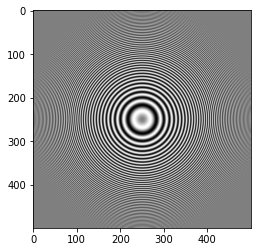

In [210]:
plt.imshow(I,cmap="gray")
plt.show()

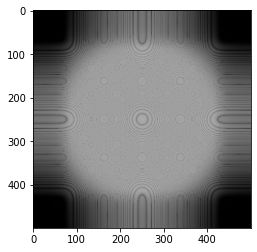

In [211]:
plt.imshow(np.log(1+np.abs(fftshift(fft2(I)))),cmap="gray")

The FT of plate image has a large amount of contribution from the low frequency sinosoides. No contribution from the frequencies at the edge ie.large values of frequencies.

In [212]:
def butterworth_filter(ft_img,mode="lowpass"):
  shape=ft_img.shape
  rc=20
  n=4
  if mode=="lowpass":
    sign=1
    sub=0
  elif mode=="highpass":
    sign=-1
    sub=1
  for i in range(shape[0]):
    for j in range(shape[1]):
      r=np.sqrt(i**2+j**2)
      ft_img[i][j]=(sub+(((1/(1+((r/rc)**(2*n))))**0.5)*sign))*ft_img[i][j]
  return ft_img

In [213]:
fft_plate=fft2(I)

In [214]:
#plt.imshow(np.real(np.log(1+fftshift(fft_plate))),cmap="gray")

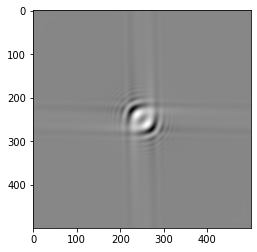

In [215]:
plt.imshow(np.abs(ifft2(butterworth_filter(fft_plate))),cmap="gray") # Low pass

In [216]:
fft_plate=fft2(I)

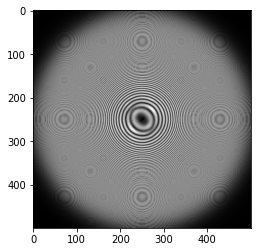

In [217]:
plt.imshow(np.abs(ifft2(butterworth_filter(fft_plate,"highpass"))),cmap="gray") # high pass

In [218]:
fft_plate=fft2(I)

In [219]:
def gaussian_filter(ft_img,mode="lowpass"):
  shape=ft_img.shape
  sigma=1
  if mode=="lowpass":
    sign=1
    sub=0
  elif mode=="highpass":
    sign=-1
    sub=1
  cen_x=shape[0]//2
  cen_y=shape[1]//2
  for i in range(shape[0]):
    for j in range(shape[1]):
      r=np.sqrt((i-cen_x)**2+(j-cen_y)**2)
      transfer_fn=np.exp(-(r**2)/(2*(sigma**2)))*sign
      ft_img[i][j]=ft_img[i][j]*(sub+transfer_fn)
  return ft_img

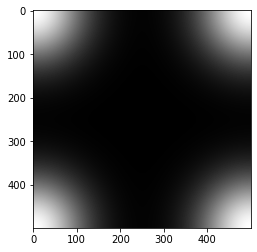

In [220]:
plt.imshow(np.abs(ifft2(gaussian_filter(fft_plate,"lowpass"))),cmap="gray")

In [221]:
fft_plate=fft2(I)

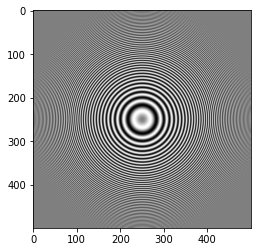

In [222]:
plt.imshow(np.abs(ifft2(gaussian_filter(fft_plate,"highpass"))),cmap="gray")

# 10.Given an image of size MXN, you are asked to perform an experiment thatconsists of repeatedly lowpass filtering the image in the frequency domain using a Gaussian lowpass filter transfer function with a cutoff frequency, D0. You may ignore computational round-off errors. Can you predict (without doing the experiment) what the result (image) will be for a sufficiently large number of applications of Gaussian? If so, what is that result?

Answer: Intiall use of gaussian filters produces an spectrum with amplitudes of small frequencies , Continous use of gaussian filter on an image keeps reducing the amplitude of even low frequency regions and would eventually lead to an black image.